In [2]:
import numpy as np
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Load the pre-trained VGG16 model without the top (classification) layer
base_model = VGG16(weights='imagenet' , include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
# Freeze the layers in the base model so they are not trained
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax')) # 10 classes for CIFAR-10

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 748s 2s/step - loss: 1.3777 - accuracy: 0.5246 - val_loss: 1.2785 - val_accuracy: 0.5539
Epoch 2/10
391/391 [==============================] - 720s 2s/step - loss: 1.1828 - accuracy: 0.5878 - val_loss: 1.1815 - val_accuracy: 0.5881
Epoch 3/10
391/391 [==============================] - 745s 2s/step - loss: 1.1161 - accuracy: 0.6113 - val_loss: 1.1553 - val_accuracy: 0.5924
Epoch 4/10
391/391 [==============================] - 744s 2s/step - loss: 1.0690 - accuracy: 0.6276 - val_loss: 1.1251 - val_accuracy: 0.6079
Epoch 5/10
391/391 [==============================] - 741s 2s/step - loss: 1.0271 - accuracy: 0.6416 - val_loss: 1.1125 - val_accuracy: 0.6038
Epoch 6/10
391/391 [==============================] - 741s 2s/step - loss: 0.9914 - accuracy: 0.6531 - val_loss: 1.1049 - val_accuracy: 0.6157
Epoch 7/10
391/391 [==============================] - 746s 2s/step - loss: 0.9522 - accuracy: 0.6674 - val_loss: 1.1036 - val_accuracy: 0.6136

In [11]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0856997966766357
Test accuracy: 0.6248000264167786


1/1 [==============================] - 1s 1s/step


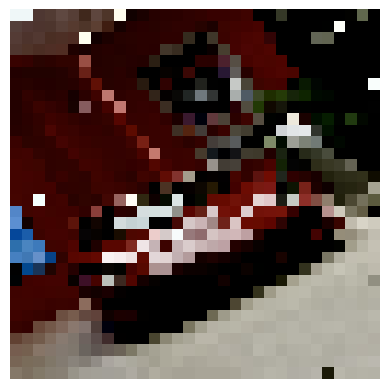

Predicted label: 8


In [18]:
# Text document/file

import matplotlib.pyplot as plt
from keras.preprocessing import image as keras_image

# Load the image
image_path = "image.png"
img = keras_image.load_img(image_path, target_size=(32, 32))
img_array = keras_image.img_to_array(img)

# Reshape and preprocess the image
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.astype('float32') / 255.0

# Make prediction
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the predicted label
print("Predicted label:", predicted_label)


In [19]:
!ls

image.png  sample_data
